# Análisis del sistema NutriScore y el grado de procesamiento NOVA

<img src="../Img/nutriscore.jpg" alt="imagen_nutriscore" width="500">

<a id="indice"></a>
## Índice de Contenidos

1. [Introducción y Marco Teórico](#1-introduccion-y-marco-teorico)  
 1.1 [Contexto del Etiquetado Nutricional Frontal](#11-contexto-del-etiquetado-nutricional-frontal)  
 1.2 [Definición del Sistema NutriScore (A a E)](#12-definicion-del-sistema-nutriscore-a-a-e)  
 1.3 [Definición de la Clasificación NOVA (1 a 4)](#13-definicion-de-la-clasificacion-nova-1-a-4)  
 1.4 [Objetivo del Análisis Exploratorio de Datos (EDA)](#14-objetivo-del-analisis-exploratorio-de-datos-eda)  

2. [Metodología y Preparación de Datos](#2-metodologia-y-preparacion-de-datos)  
 2.1 [Origen de los Datos (Open Food Facts)](#21-origen-de-los-datos-open-food-facts)  
 2.2 [Proceso de Limpieza y Depuración](#22-proceso-de-limpieza-y-depuracion)  
 2.3 [Dataset Final (Tamaño: 3.534 productos)](#23-dataset-final-tamano-3534-productos)  

3. [Exploración Inicial de la Distribución](#3-exploracion-inicial-de-la-distribucion)  
 3.1 [Distribución de NutriScore en el Dataset](#31-distribucion-de-nutriscore-en-el-dataset)  
 3.2 [Distribución de la Clasificación NOVA en el Dataset](#32-distribucion-de-la-clasificacion-nova-en-el-dataset)  
 3.3 [Análisis de la Polarización de la Muestra](#33-analisis-de-la-polarizacion-de-la-muestra)  

4. [Prueba de Hipótesis (H1, H2, H3, H4, H5)](#4-prueba-de-hipotesis-h1-h2-h3-h4-h5)  
 4.1 [H1 – Relación entre NutriScore y contenido nutricional](#41-h1-relacion-entre-nutriscore-y-contenido-nutricional)  
 4.2 [H2 – Correlación entre NOVA y NutriScore](#42-h2-correlacion-entre-nova-y-nutriscore)  
 4.3 [H3 – Densidad calórica y NutriScore](#43-h3-densidad-calorica-y-nutriscore)  
 4.4 [H4 – NutriScore dentro de los ultraprocesados (NOVA 4)](#44-h4-nutriscore-dentro-de-los-ultraprocesados-nova4)  
 4.5 [H5 – Consumo y calidad nutricional en España](#45-h5-consumo-y-calidad-nutricional-en-espana)

5. [Hallazgo Crítico y Consumo (Hipótesis H5)](#5-hallazgo-critico-y-consumo-hipotesis-h5)  
 5.1. [El Hallazgo Crítico: La Discrepancia entre Sistemas](#51-el-hallazgo-critico-la-discrepancia-entre-sistemas)  
 5.2. [Análisis de Consumo y Verificación de la Hipótesis H5](#52-analisis-de-consumo-y-verificacion-de-la-hipotesis-h5)

6. [Conclusiones Finales](#6-conclusiones-finales)



<a id="1-introduccion-y-marco-teorico"></a>
# 1. Introducción y Marco Teórico



<a id="11-contexto-del-etiquetado-nutricional-frontal"></a>
## 1.1. Contexto del Etiquetado Nutricional Frontal

En los últimos años, el etiquetado nutricional frontal ha ganado protagonismo como herramienta clave para orientar las decisiones de consumo alimentario.  
Esta herramienta busca ofrecer al consumidor una información clara y rápida sobre la calidad nutricional de los productos que adquiere.


<img src="../Img/image-9.png" alt="imagen_nutriscore" width="500">


<a id="12-definicion-del-sistema-nutriscore-a-a-e"></a>
## 1.2. Definición del Sistema NutriScore (A a E)

Uno de los sistemas más extendidos en Europa es el **NutriScore**, un semáforo nutricional que clasifica los alimentos de la **A (más saludable)** a la **E (menos saludable)**.  
La puntuación se basa en la composición por 100g de producto, penalizando el contenido en energía, azúcares, grasas saturadas y sodio, y valorando positivamente el contenido de frutas, verduras, fibra y proteínas.


<img src="../Img/Nutri-Score-examples-1.png" alt="imagen_ejemplos_nutriscore" width="800">


<a id="13-definicion-de-la-clasificacion-nova-1-a-4"></a>
## 1.3. Definición de la Clasificación NOVA (1 a 4)

Este enfoque ha generado debate, ya que evalúa la calidad nutricional, pero no considera directamente el nivel de procesamiento industrial del alimento.  
Para medir este aspecto se emplea la **clasificación NOVA**, que agrupa los productos según su grado de procesamiento:

- **NOVA 1:** Alimentos no procesados o mínimamente procesados.  
- **NOVA 2:** Ingredientes culinarios procesados.  
- **NOVA 3:** Alimentos procesados.  
- **NOVA 4:** Alimentos y bebidas ultraprocesados.



<a id="14-objetivo-del-analisis-exploratorio-de-datos-eda"></a>
## 1.4. Objetivo del Análisis Exploratorio de Datos (EDA)

En este análisis exploratorio se estudia la coherencia entre NutriScore y NOVA, con el objetivo de:

- Comprobar si los productos con peor perfil nutricional según NutriScore son también los más procesados según NOVA.  
- Evaluar si el NutriScore refleja correctamente los niveles de azúcares, grasas y sal.  
- Determinar si los productos de baja densidad calórica obtienen siempre una buena calificación.  
- Analizar si el NutriScore se correlaciona con los valores nutricionales reales y con el grado de procesamiento NOVA.


[⬆️ Ir al Índice](#indice)



<a id="2-metodologia-y-preparacion-de-datos"></a>
# 2. Metodología y Preparación de Datos



<a id="21-origen-de-los-datos-open-food-facts"></a>
## 2.1. Origen de los Datos (Open Food Facts)

Para la realización del estudio se utiliza la base de datos colaborativa **Open Food Facts**.  
El proceso inicial incluye la importación de librerías esenciales (`pandas`, `numpy`, `matplotlib`, `seaborn`, `plotly`) y la carga del dataset original para la revisión inicial (dimensiones, tipos de datos y valores nulos).



<a id="22-proceso-de-limpieza-y-depuracion"></a>
## 2.2. Proceso de Limpieza y Depuración

Se aplicó un riguroso proceso de limpieza y depuración para garantizar la fiabilidad del análisis. Las tareas clave incluyeron:

- Eliminar columnas vacías o con demasiados valores nulos (`df.dropna(thres=...)`).  
- Mantener las variables relevantes: producto, calorías, valor NOVA, valor NutriScore, azúcar, sal.  
- Convertir tipos de datos si es necesario para asegurar la comparabilidad.



<a id="23-dataset-final-tamano-3534-productos"></a>
## 2.3. Dataset Final (Tamaño: 3.534 productos)

Tras el proceso de limpieza y depuración, el dataset final comprende **3.534 productos**, que constituyen la muestra definitiva utilizada para la exploración y el análisis de hipótesis.


[⬆️ Ir al Índice](#indice)



<a id="3-exploracion-inicial-de-la-distribucion"></a>
# 3. Exploración Inicial de la Distribución

Esta fase inicial permite entender la composición de la muestra utilizada y sirve como base para las pruebas de hipótesis posteriores.


In [1]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from time import sleep
import warnings
warnings.filterwarnings("ignore")
#from EDA_Nutriscore_NOVA.Utils.variables import *

In [2]:
colores_nova = ['#44AA44', '#DDDD44', '#FFAA00', '#CC4444']
colores = ['#00814B', '#8CE700','#FFD500', '#FF8121', '#E11E10']
nutri_orden = ['a', 'b', 'c', 'd', 'e']
orden_nova = [1, 2, 3, 4]

In [3]:
# Cargar el Dataset
try:
    df = pd.read_csv('../Data/df_util_sin_bebidas.csv') 
    print("Dataset cargado correctamente\n")
except FileNotFoundError:
    print("Error: Asegúrate de que el archivo 'df_util_sin_bebidas.csv' está en el directorio correcto.")

Dataset cargado correctamente



In [4]:
#  Revisar Dimensiones y Tipos de Datos 
print(" Dimensiones y Tipos de Datos (df.info())")
print("-" * 50)
df.info()

 Dimensiones y Tipos de Datos (df.info())
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   3534 non-null   int64  
 1   product_name_es              3534 non-null   object 
 2   quantity                     2891 non-null   object 
 3   brands                       3349 non-null   object 
 4   categories                   3285 non-null   object 
 5   nutrition_data_per           3534 non-null   object 
 6   nutrition_data_prepared_per  3534 non-null   object 
 7   energy-kcal_value            3534 non-null   float64
 8   energy-kcal_unit             2607 non-null   object 
 9   fat_value                    3534 non-null   float64
 10  fat_unit                     2794 non-null   object 
 11  saturated-fat_value          2715 non-nul

In [5]:
#  Resumen Nutricional Básico 
print("Resumen Nutricional Básico (por 100g)")
print("-" * 60)
columnas_numericas_clave = ['sugars_value', 'fat_value', 'salt_value', 'proteins_value']

print("VARIABLE | MEDIA | MEDIANA")
print("---------------------------------")

for col in columnas_numericas_clave:
    media = df[col].mean()
    mediana = df[col].median()
    print(f"{col:<12} | {media:.2f} | {mediana:.2f}")



Resumen Nutricional Básico (por 100g)
------------------------------------------------------------
VARIABLE | MEDIA | MEDIANA
---------------------------------
sugars_value | 7.06 | 2.40
fat_value    | 15.18 | 3.60
salt_value   | 3.42 | 0.20
proteins_value | 9.15 | 5.30


In [6]:
# Conteo de Valores Nulos 
print("Resumen de Valores Nulos (%)")
print("-" * 50)
nulos_porcentaje = (df.isnull().sum() / len(df) * 100).sort_values(ascending=True)

print("COLUMNA | PORCENTAJE DE NULOS")
print("----------------------------------")

for col, perc in nulos_porcentaje.items():
    print(f"{col:<25} | {perc:.2f}%")

Resumen de Valores Nulos (%)
--------------------------------------------------
COLUMNA | PORCENTAJE DE NULOS
----------------------------------
Unnamed: 0                | 0.00%
product_name_es           | 0.00%
nutrition_data_prepared_per | 0.00%
nutrition_data_per        | 0.00%
energy-kcal_value         | 0.00%
fat_value                 | 0.00%
sugars_value              | 0.00%
salt_value                | 0.00%
off:nova_groups_tags      | 0.00%
off:nutriscore_grade      | 0.00%
Categoria                 | 0.00%
brands                    | 5.23%
categories                | 7.05%
off:food_groups           | 14.94%
off:food_groups_tags      | 14.94%
quantity                  | 18.19%
fat_unit                  | 20.94%
proteins_unit             | 20.97%
proteins_value            | 21.02%
carbohydrates_unit        | 21.08%
carbohydrates_value       | 21.14%
energy_value              | 21.28%
energy_unit               | 21.28%
sugars_unit               | 22.89%
saturated-fat_unit        


<a id="31-distribucion-de-nutriscore-en-el-dataset"></a>
## 3.1. Distribución de NutriScore en el Dataset

La distribución de NutriScore muestra una clara polarización en los extremos del semáforo.  
Los grados más frecuentes en la muestra son la **A** y la **E**:

- 33.6% de los productos obtuvieron el grado **A**.  
- 20.7% de los productos obtuvieron el grado **E**.

Esta distribución indica que la muestra contiene tanto una alta proporción de alimentos con excelente perfil nutricional, como una proporción significativa de alimentos con el peor perfil.


In [7]:
# Mapeo de Variables Numéricas (Necesario para el conteo)
nutri_map = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
# Creamos la columna 'nutriscore_num' para el resto del análisis
df['nutriscore_num'] = df['off:nutriscore_grade'].map(nutri_map)
len(df['nutriscore_num'])

3534


<a id="32-distribucion-de-la-clasificacion-nova-en-el-dataset"></a>
## 3.2. Distribución de la Clasificación NOVA en el Dataset


In [8]:
#  Distribución del Grado NutriScore (Calidad) 
nutri_distribucion = (df['off:nutriscore_grade'].value_counts(normalize=True).sort_index() * 100)

print("### Distribución Porcentual del NutriScore (A - E) ###")
print(f"Base del Análisis: {len(df)} Productos")
print("-" * 50)
print("Grado | Porcentaje (%)")
print("-----------------------")
for grade, perc in nutri_distribucion.items():
    print(f"{grade.upper():<5} | {perc:.2f}%")

### Distribución Porcentual del NutriScore (A - E) ###
Base del Análisis: 3534 Productos
--------------------------------------------------
Grado | Porcentaje (%)
-----------------------
A     | 33.56%
B     | 16.07%
C     | 12.93%
D     | 16.72%
E     | 20.71%


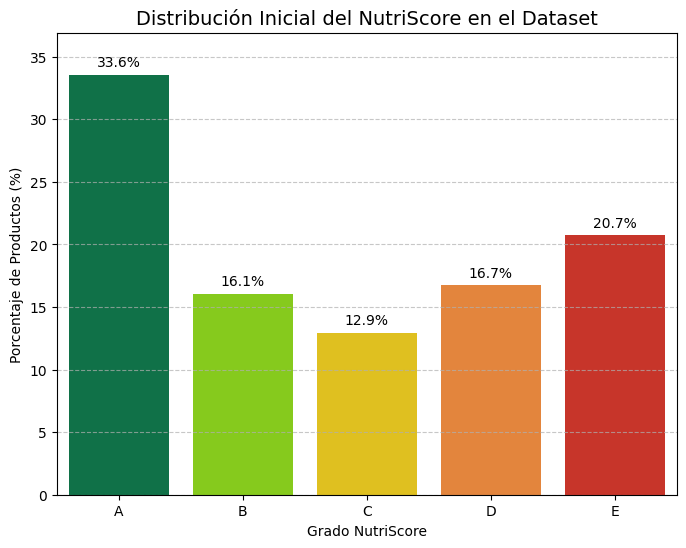

In [9]:
# Preparación de datos para el gráfico

nutri_df_inicial = nutri_distribucion.reindex(nutri_orden, fill_value=0).rename('Porcentaje').reset_index()
nutri_df_inicial.columns = ['Grado', 'Porcentaje']
nutri_df_inicial['Grado'] = nutri_df_inicial['Grado'].str.upper()

# Generación del Gráfico
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x='Grado', 
    y='Porcentaje', 
    data=nutri_df_inicial, 
    order=['A', 'B', 'C', 'D', 'E'],
    palette=colores
)

plt.title('Distribución Inicial del NutriScore en el Dataset', fontsize=14)
plt.xlabel('Grado NutriScore')
plt.ylabel('Porcentaje de Productos (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, nutri_df_inicial['Porcentaje'].max() * 1.1)

# Añadir etiquetas de porcentaje encima de las barras
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%", 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 9), 
        textcoords='offset points'
    )

plt.show()

Respecto al procesamiento, la clasificación NOVA en el dataset está dominada por el grupo de alimentos de mayor procesamiento:

- 37.4% de los productos son **NOVA 4 (Ultraprocesados)**.  
- Los grupos menos procesados (NOVA 1, 2 y 3) representan el **62.6% restante**.


<a id="32-distribucion-de-la-clasificacion-nova-en-el-dataset"></a>
## 3.2. Distribución de la Clasificación NOVA en el Dataset


In [10]:
df['off:nova_groups_tags'].unique()

array(['en:4-ultra-processed-food-and-drink-products',
       'en:1-unprocessed-or-minimally-processed-foods',
       'en:3-processed-foods', 'en:2-processed-culinary-ingredients',
       'unknown', 'not-applicable'], dtype=object)

In [11]:
#  Mapeo de Variables Numéricas (Necesario para el conteo)
df['nova_group'] = df['off:nova_groups_tags'].astype(str).str.extract(r'(\d)').astype(float) # Creamos la columna 'nova_group' (1 a 4)
len(df['nova_group'])
df

,Unnamed: 0,product_name_es,quantity,brands,categories,nutrition_data_per,nutrition_data_prepared_per,energy-kcal_value,energy-kcal_unit,fat_value,...,sodium_unit,energy_value,energy_unit,off:food_groups,off:food_groups_tags,off:nova_groups_tags,off:nutriscore_grade,Categoria,nutriscore_num,nova_group
0,0,Tomate frito,400 g,Hacendado,"Condimentos, Salsas, en:Meal sauces, Salsas de...",100g,serving,77.0,kcal,3.50,...,g,77.0,kcal,en:dressings-and-sauces,"en:fats-and-sauces,en:dressings-and-sauces",en:4-ultra-processed-food-and-drink-products,c,"Salsas, Condimentos y Aditivos",3,4.0
1,1,Kéfir natural sabor suave,500 g,Hacendado,"Lácteos, Comidas fermentadas, Productos fermen...",100g,100g,74.0,kcal,4.20,...,mg,308.0,kJ,en:dairy-desserts,"en:milk-and-dairy-products,en:dairy-desserts",en:1-unprocessed-or-minimally-processed-foods,b,Lácteos y Derivados,2,1.0
2,2,Corn Flakes 0% azúcares añadidos,30,Hacendado,"Alimentos y bebidas de origen vegetal, Aliment...",100g,100g,373.0,kcal,1.10,...,g,1583.0,kJ,en:breakfast-cereals,"en:cereals-and-potatoes,en:breakfast-cereals",en:3-processed-foods,c,"Cereales, Panadería y Pasta",3,3.0
3,3,Galletas de trigo espelta 0% azúcares añadidos,200 g,Hacendado,"Botanas, Snacks dulces, Galletas y pasteles, e...",100g,100g,422.0,kcal,16.00,...,g,422.0,kcal,en:biscuits-and-cakes,"en:sugary-snacks,en:biscuits-and-cakes",en:4-ultra-processed-food-and-drink-products,b,"Cereales, Panadería y Pasta",2,4.0
4,4,Tomate frito,630 g (3 x 210 g),Hacendado,"Condimentos, Salsas, en:Meal sauces, Salsas de...",100g,100g,81.0,kcal,3.00,...,mg,329.0,kJ,en:dressings-and-sauces,"en:fats-and-sauces,en:dressings-and-sauces",en:3-processed-foods,a,"Salsas, Condimentos y Aditivos",1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,3873,Potón en tinta,Peso neto: 240 g (80 g x 3),"Aldi, Sal de plata","Productos del mar, en:Fishes and their product...",100g,100g,212.0,kcal,17.10,...,g,878.0,kJ,en:fish-and-seafood,"en:fish-meat-eggs,en:fish-and-seafood",en:4-ultra-processed-food-and-drink-products,b,"Pescados, Mariscos y Derivados",2,4.0
3530,3874,Colorante alimentario,85g,Hacendado,"Aditivos alimentarios, Colorantes alimentarios",100g,100g,101.0,NaN,3.35,...,NaN,NaN,NaN,NaN,NaN,en:4-ultra-processed-food-and-drink-products,a,"Salsas, Condimentos y Aditivos",1,4.0
3531,3875,Lomo embuchado,150 g,Realvalle,"Productos a base de carne, Carnes, Carne de ce...",100g,100g,203.0,kcal,6.70,...,g,855.0,kJ,en:meat-other-than-poultry,"en:fish-meat-eggs,en:meat,en:meat-other-than-p...",en:4-ultra-processed-food-and-drink-products,e,"Carne, Aves y Productos Cárnicos",5,4.0
3532,3876,Pollo al curry ecológico,450g,Dehesa del milagro,"Comidas preparadas, Ecológica",100g,100g,143.0,kcal,7.00,...,g,597.0,kJ,en:one-dish-meals,"en:composite-foods,en:one-dish-meals",en:3-processed-foods,b,"Carne, Aves y Productos Cárnicos",2,3.0


In [12]:
#  Distribución del Grupo NOVA (Procesamiento)
nova_distribucion = (df['nova_group'].value_counts(normalize=True).sort_index() * 100)

print("\n### Distribución Porcentual del Grupo NOVA (1 - 4) ###")
print("-" * 50)
print("NOVA | Porcentaje (%)")
print("-----------------------")
for group, perc in nova_distribucion.items():
    if group in [1.0, 2.0, 3.0, 4.0]:
        print(f"{int(group):<5} | {perc:.2f}%")


### Distribución Porcentual del Grupo NOVA (1 - 4) ###
--------------------------------------------------
NOVA | Porcentaje (%)
-----------------------
1     | 27.29%
2     | 8.06%
3     | 27.21%
4     | 37.43%


In [13]:
# Convertir a DataFrame para graficos
nova_df_inicial = nova_distribucion.rename('Porcentaje').reset_index()
nova_df_inicial.columns = ['Grupo NOVA', 'Porcentaje']
nova_df_inicial['Grupo NOVA'] = nova_df_inicial['Grupo NOVA'].astype(int)
nova_df_inicial = nova_df_inicial.sort_values(by='Grupo NOVA') # Asegura el orden 1 a 4


In [14]:
nova_df_inicial

,Grupo NOVA,Porcentaje
0,1,27.294589
1,2,8.056112
2,3,27.214429
3,4,37.434870


Respecto al procesamiento, la clasificación NOVA en el dataset está dominada por el grupo de alimentos de mayor procesamiento:

- 37.4% de los productos son **NOVA 4 (Ultraprocesados)**.  
- Los grupos menos procesados (NOVA 1, 2 y 3) representan el **62.6% restante**.

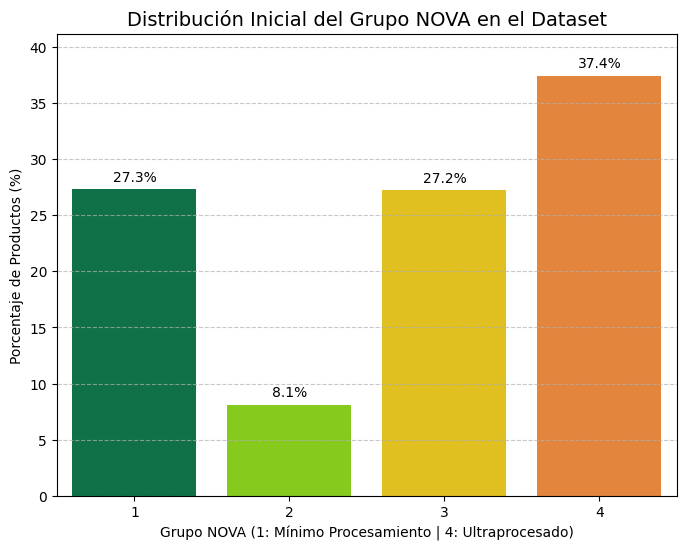

In [15]:
# Generación del Gráfico
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x='Grupo NOVA', 
    y='Porcentaje', 
    data=nova_df_inicial, 
    order=orden_nova,
    palette=colores
)

plt.title('Distribución Inicial del Grupo NOVA en el Dataset', fontsize=14)
plt.xlabel('Grupo NOVA (1: Mínimo Procesamiento | 4: Ultraprocesado)')
plt.ylabel('Porcentaje de Productos (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, nova_df_inicial['Porcentaje'].max() * 1.1)

# Añadir etiquetas de porcentaje encima de las barras
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%", 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 9), 
        textcoords='offset points'
    )

plt.show()

<a id="33-analisis-de-la-polarizacion-de-la-muestra"></a>
## 3.3. Análisis de la Polarización de la Muestra

La coexistencia de una alta representación de productos **A (excelente calidad nutricional)** y de productos **NOVA 4 (ultraprocesados)** revela que la muestra está altamente polarizada.  
Esta característica será fundamental para evaluar la coherencia entre ambos sistemas, ya que desafía a NutriScore a clasificar correctamente un gran volumen de productos ultraprocesados.

[⬆️ Ir al Índice](#indice)


<a id="4-prueba-de-hipotesis-h1-h2-h3-h4-h5"></a>
# 4. Prueba de Hipótesis (H1, H2, H3, H4, H5)



<a id="hipotesis-de-trabajo"></a>
## Hipótesis de Trabajo

- **H1:** Un peor NutriScore implica mayor contenido en azúcar, grasa y sal.  
- **H2:** A mayor nivel de procesamiento (peor NOVA), peor NutriScore.  
- **H3:** Los productos bajos en calorías no siempre obtienen un buen NutriScore.  
- **H4:** Dentro de los productos ultraprocesados (NOVA 4), el NutriScore no diferencia bien la calidad nutricional.  
- **H5:** Los alimentos más consumidos en España tienden a tener bajo NutriScore y alto nivel NOVA.

*(El análisis detallado de cada hipótesis, con sus respectivos gráficos y conclusiones, se desarrolla en las siguientes secciones.)*


<a id="41-h1-relacion-entre-nutriscore-y-contenido-nutricional"></a>
## 4.1. H1 – Relación entre NutriScore y contenido nutricional


In [16]:
# Columnas necesarias para la H1: NutriScore y los 3 nutrientes malos.
columnas_h1 = ['off:nutriscore_grade', 'sugars_value', 'fat_value', 'salt_value']

# Crear el DataFrame específico eliminando filas con NaN en las columnas clave
df_h1 = df.dropna(subset=columnas_h1).copy()

print(f"DataFrame 'df_h1' creado.")
print(f"Registros iniciales: {len(df)}")
print(f"Registros de H1 (sin NaN en nutrientes): {len(df_h1)}")

DataFrame 'df_h1' creado.
Registros iniciales: 3534
Registros de H1 (sin NaN en nutrientes): 3534


In [17]:
df_h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   3534 non-null   int64  
 1   product_name_es              3534 non-null   object 
 2   quantity                     2891 non-null   object 
 3   brands                       3349 non-null   object 
 4   categories                   3285 non-null   object 
 5   nutrition_data_per           3534 non-null   object 
 6   nutrition_data_prepared_per  3534 non-null   object 
 7   energy-kcal_value            3534 non-null   float64
 8   energy-kcal_unit             2607 non-null   object 
 9   fat_value                    3534 non-null   float64
 10  fat_unit                     2794 non-null   object 
 11  saturated-fat_value          2715 non-null   float64
 12  saturated-fat_unit           2718 non-null   object 
 13  carbohydrates_valu

In [18]:
df_h1.describe()

,Unnamed: 0,energy-kcal_value,fat_value,saturated-fat_value,carbohydrates_value,sugars_value,proteins_value,salt_value,sodium_value,energy_value,nutriscore_num,nova_group
count,3534.000000,3534.000000,3534.000000,2715.000000,2787.000000,3534.000000,2791.000000,3534.000000,2714.000000,2782.000000,3534.000000,2495.000000
mean,1915.351443,251.724824,15.181859,5.679501,18.835448,7.062136,9.149315,3.422947,1.838980,615.744825,2.749576,2.747896
std,1122.321306,217.943651,22.285225,8.697522,24.442345,13.173784,10.706307,74.462076,34.025568,763.257955,1.561040,1.218085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,947.250000,78.000000,1.792500,0.400000,1.900000,0.500000,1.800000,0.100000,0.032000,131.000000,1.000000,1.000000
50%,1900.500000,152.000000,3.605000,2.200000,5.300000,2.400000,5.300000,0.200000,0.152000,359.350000,3.000000,3.000000
75%,2906.750000,393.000000,22.750000,8.500000,33.650000,5.000000,13.800000,1.100000,0.600000,662.750000,4.000000,4.000000
max,3877.000000,1965.000000,312.000000,219.000000,100.000000,97.000000,232.000000,4000.000000,1600.000000,4181.000000,5.000000,4.000000


Que esperamos ver: Los productos con NutriScore D y E tendrán valores más altos de azúcar, grasa y sal que los de NutriScore A o B.

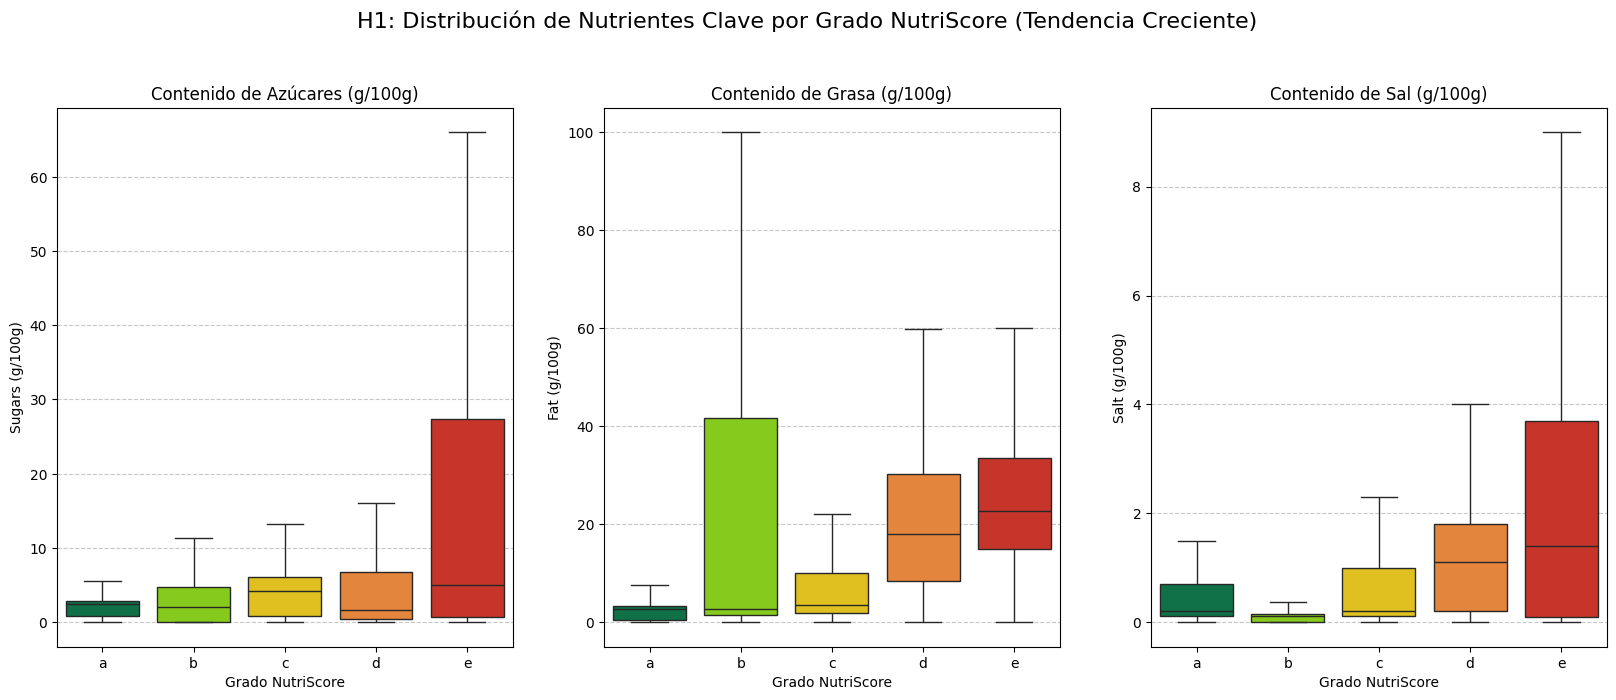

In [19]:
#graficos

df_h1 = df_h1[df_h1['off:nutriscore_grade'].isin(nutri_orden)]

# Definimos las variables a analizar y el orden del NutriScore
nutrientes = ['sugars_value', 'fat_value', 'salt_value']
titulos = ['Contenido de Azúcares (g/100g)', 'Contenido de Grasa (g/100g)', 'Contenido de Sal (g/100g)']


# Creamos la figura que contendrá los 3 gráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=False)
plt.suptitle('H1: Distribución de Nutrientes Clave por Grado NutriScore (Tendencia Creciente)', fontsize=16, y=1.02)

for i, nutriente in enumerate(nutrientes):
    sns.boxplot(
        x='off:nutriscore_grade',
        y=nutriente,
        data=df_h1,
        order=nutri_orden,
        ax=axes[i],
        palette=colores,
        showfliers=False  # Ocultamos los outliers para mayor claridad en la tendencia central
    )
    
    
    # Añadimos etiquetas y título
    axes[i].set_title(titulos[i])
    axes[i].set_xlabel('Grado NutriScore')
    axes[i].set_ylabel(nutriente.replace('_value', '').capitalize() + ' (g/100g)')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)







Azúcar y sal muestran una relación clara con el NutriScore.

La grasa total no sigue el mismo patrón, posiblemente por su composición diversa.

En conjunto, NutriScore penaliza de forma coherente los nutrientes críticos, aunque simplifica algunos matices nutricionales.

Los boxplots muestran una tendencia clara: las medianas y los cuartiles superiores de azúcar y sal aumentan conforme empeora el NutriScore (de A a E). En el caso de grasa, aunque existe una ligera elevación en las categorías D–E, la distribución es más dispersa y muestra una mayor superposición entre grados (probablemente por la presencia de grasas no saturadas en ciertos productos con NutriScore favorable).

En conjunto, los boxplots confirman que NutriScore penaliza de forma notable los nutrientes críticos (azúcar y sal). No obstante, la variabilidad observada en grasa sugiere que NutriScore no diferencia entre tipos de grasa ni entre alimentos altos en grasa “saludable” (p. ej. frutos secos) y aquellos con grasas menos deseables.
Como se aprecia en el segundo boxplot (Grasa), las cajas son anchas y se superponen entre grados, reflejando esa variabilidad.

Por ejemplo, una bebida carbonatada azucarada (NutriScore E) concentra una alta densidad de azúcares simples, lo que penaliza su calificación. En contraste, un aceite de oliva virgen extra (NutriScore B), aunque rico en grasa, obtiene mejor puntuación por tratarse de grasa monoinsaturada y por su perfil beneficioso en la dieta mediterránea

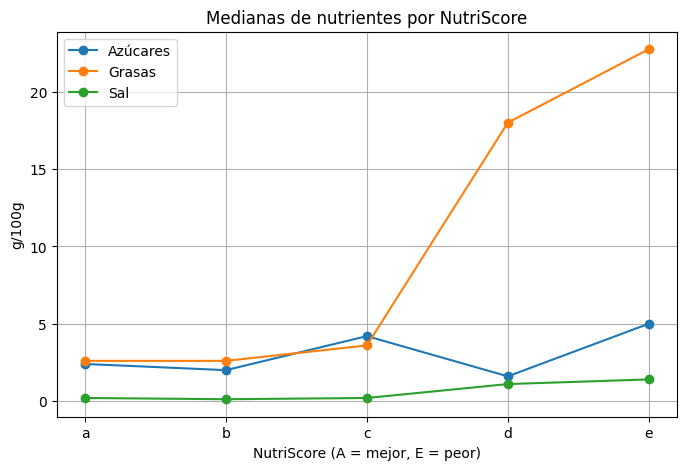

In [20]:
# --- MEDIANAS POR NUTRISCORE ---
medianas = (
    df_h1.groupby('off:nutriscore_grade')[['sugars_value', 'fat_value', 'salt_value']]
    .median()
    .reindex(nutri_orden)
    .reset_index()
)

# --- GRÁFICO DE MEDIANAS ---
plt.figure(figsize=(8,5))
plt.plot(medianas['off:nutriscore_grade'], medianas['sugars_value'], marker='o', label='Azúcares')
plt.plot(medianas['off:nutriscore_grade'], medianas['fat_value'], marker='o', label='Grasas')
plt.plot(medianas['off:nutriscore_grade'], medianas['salt_value'], marker='o', label='Sal')
plt.title("Medianas de nutrientes por NutriScore")
plt.xlabel("NutriScore (A = mejor, E = peor)")
plt.ylabel("g/100g")
plt.legend()
plt.grid(True)
plt.show()

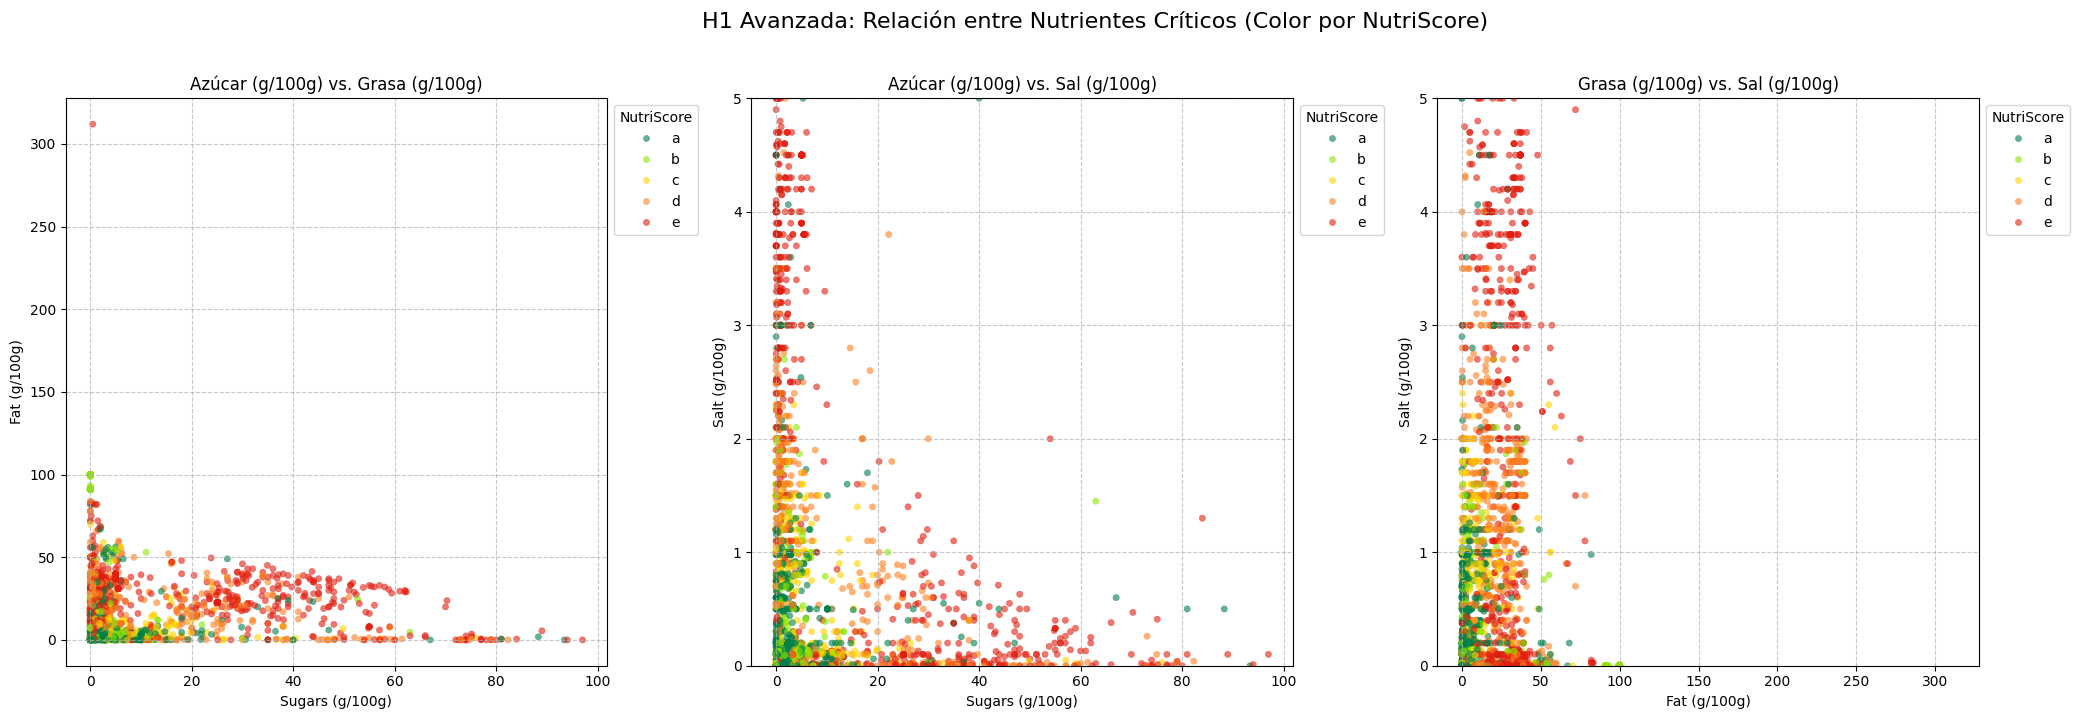

In [21]:
#Graficos de scatter

pares_nutrientes = [
    ('sugars_value', 'fat_value'), 
    ('sugars_value', 'salt_value'), 
    ('fat_value', 'salt_value')
]
titulos = [
    'Azúcar (g/100g) vs. Grasa (g/100g)', 
    'Azúcar (g/100g) vs. Sal (g/100g)', 
    'Grasa (g/100g) vs. Sal (g/100g)'
]


# Creamos la figura que contendrá los 3 gráficos
fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=False)
plt.suptitle('H1 Avanzada: Relación entre Nutrientes Críticos (Color por NutriScore)', fontsize=16, y=1.02)

for i, (x_nutriente, y_nutriente) in enumerate(pares_nutrientes):
    sns.scatterplot(
        x=x_nutriente,
        y=y_nutriente,
        data=df_h1,
        hue='off:nutriscore_grade',  # CLAVE: Color según el NutriScore
        hue_order=nutri_orden,
        palette=colores,
        ax=axes[i],
        alpha=0.6,
        s=20, 
        edgecolor=None 
    )
    
    # Añadimos etiquetas y título
    axes[i].set_title(titulos[i])
    axes[i].set_xlabel(x_nutriente.replace('_value', '').capitalize() + ' (g/100g)')
    axes[i].set_ylabel(y_nutriente.replace('_value', '').capitalize() + ' (g/100g)')
    axes[i].grid(axis='both', linestyle='--', alpha=0.7)
    
    # Movemos la leyenda fuera del área de trazado
    axes[i].legend(title='NutriScore', loc='upper left', bbox_to_anchor=(1, 1))
    
    # Opcional: Limitamos la visualización en el eje Y para la Sal para mayor claridad
    if 'salt' in y_nutriente:
        axes[i].set_ylim(0, 5) 

# Ajustamos el layout
plt.tight_layout(rect=[0, 0, 0.95, 1.0]) 
plt.show()

- Azucares:
  - Tendencia general:
A medida que el NutriScore empeora (de A→E), la mediana de azúcares aumenta.
Los productos con NutriScore A y B tienen valores bajos y concentrados, mientras que D y E muestran distribuciones más amplias y con valores altos.
  - Conclusión:
Confirma la hipótesis de que un peor NutriScore se asocia con más azúcar.
- Grasas
  - Tendencia general:
La dispersión es mayor, pero hay un patrón: A y B suelen tener menos grasa. (Algunos productos saludables pueden tener grasa por su tipo, p.ej. frutos secos).
C, D y E presentan medianas y rangos más altos, aunque con cierta variabilidad 
  - Conclusión: También respalda la hipótesis: peor NutriScore = más grasas saturadas.
- Sales
  - Tendencia general:
Hay un incremento progresivo de sal a medida que el NutriScore empeora.
Los productos con NutriScore E tienen medianas y máximos notablemente más altos.
  - Conclusión:
La sal sigue la misma pauta: más sal implica peor NutriScore.

[⬆️ Ir al Índice](#indice)

<a id="42-h2-correlacion-entre-nova-y-nutriscore"></a>
## 4.2. H2 – Correlación entre NOVA y NutriScore


In [22]:
# Columnas necesarias para la H2: NutriScore numérico y el Grupo NOVA.
columnas_h2 = ['nutriscore_num', 'nova_group']

# Crear el DataFrame específico eliminando filas con NaN en las columnas clave 
df_h2 = df.dropna(subset=columnas_h2).copy()

print(f"DataFrame 'df_h2' creado.")
print(f"Registros iniciales: {len(df)}")
print(f"Registros de H2 (sin NaN en NutriScore o NOVA): {len(df_h2)}")

DataFrame 'df_h2' creado.
Registros iniciales: 3534
Registros de H2 (sin NaN en NutriScore o NOVA): 2495


Que esperamos ver: Que los productos con NOVA 4 (ultraprocesados) tengan NutriScore más altos (D o E) en comparación con los NOVA 1 o 2.

In [23]:
df_h2.columns

Index(['Unnamed: 0', 'product_name_es', 'quantity', 'brands', 'categories',
       'nutrition_data_per', 'nutrition_data_prepared_per',
       'energy-kcal_value', 'energy-kcal_unit', 'fat_value', 'fat_unit',
       'saturated-fat_value', 'saturated-fat_unit', 'carbohydrates_value',
       'carbohydrates_unit', 'sugars_value', 'sugars_unit', 'proteins_value',
       'proteins_unit', 'salt_value', 'salt_unit', 'sodium_value',
       'sodium_unit', 'energy_value', 'energy_unit', 'off:food_groups',
       'off:food_groups_tags', 'off:nova_groups_tags', 'off:nutriscore_grade',
       'Categoria', 'nutriscore_num', 'nova_group'],
      dtype='object')

In [24]:
# Calcular el NutriScore promedio para cada Grupo NOVA
promedio_nutriscore_por_nova = df_h2.groupby('nova_group')['nutriscore_num'].mean().reset_index()
promedio_nutriscore_por_nova.columns = ['Grupo_NOVA', 'NutriScore_Promedio']

print("📊 NutriScore Promedio por Grupo NOVA (1=A, 5=E)")
print("-" * 50)
print(promedio_nutriscore_por_nova)

📊 NutriScore Promedio por Grupo NOVA (1=A, 5=E)
--------------------------------------------------
   Grupo_NOVA  NutriScore_Promedio
0         1.0             1.556535
1         2.0             2.726368
2         3.0             2.916053
3         4.0             3.510707


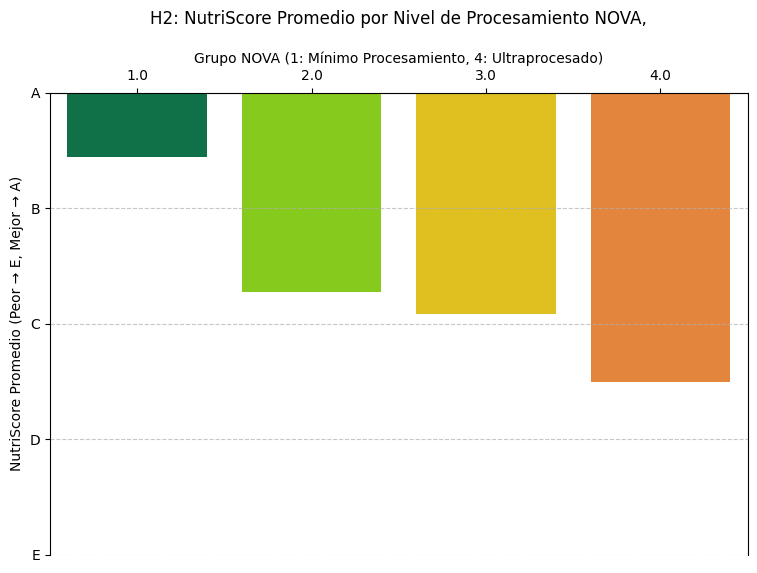

In [25]:
#graficos

orden_nutri =[1,2,3,4,5]
valores_nutri=["A","B","C","D","E"]
plt.figure(figsize=(9, 6))
ax=sns.barplot(
    x='Grupo_NOVA',
    y='NutriScore_Promedio',
    data=promedio_nutriscore_por_nova,
    palette=colores,
    order=[1.0,2.0,3.0,4.0]

)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.spines['bottom'].set_visible(False)
plt.title('H2: NutriScore Promedio por Nivel de Procesamiento NOVA,', pad=20)
plt.xlabel('Grupo NOVA (1: Mínimo Procesamiento, 4: Ultraprocesado)')
plt.ylabel('NutriScore Promedio (Peor → E, Mejor → A)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis() 
plt.ylim(5, 1)
plt.yticks(orden_nutri,valores_nutri)


plt.show()

In [26]:
df_h2.head()

,Unnamed: 0,product_name_es,quantity,brands,categories,nutrition_data_per,nutrition_data_prepared_per,energy-kcal_value,energy-kcal_unit,fat_value,...,sodium_unit,energy_value,energy_unit,off:food_groups,off:food_groups_tags,off:nova_groups_tags,off:nutriscore_grade,Categoria,nutriscore_num,nova_group
0,0,Tomate frito,400 g,Hacendado,"Condimentos, Salsas, en:Meal sauces, Salsas de...",100g,serving,77.0,kcal,3.5,...,g,77.0,kcal,en:dressings-and-sauces,"en:fats-and-sauces,en:dressings-and-sauces",en:4-ultra-processed-food-and-drink-products,c,"Salsas, Condimentos y Aditivos",3,4.0
1,1,Kéfir natural sabor suave,500 g,Hacendado,"Lácteos, Comidas fermentadas, Productos fermen...",100g,100g,74.0,kcal,4.2,...,mg,308.0,kJ,en:dairy-desserts,"en:milk-and-dairy-products,en:dairy-desserts",en:1-unprocessed-or-minimally-processed-foods,b,Lácteos y Derivados,2,1.0
2,2,Corn Flakes 0% azúcares añadidos,30,Hacendado,"Alimentos y bebidas de origen vegetal, Aliment...",100g,100g,373.0,kcal,1.1,...,g,1583.0,kJ,en:breakfast-cereals,"en:cereals-and-potatoes,en:breakfast-cereals",en:3-processed-foods,c,"Cereales, Panadería y Pasta",3,3.0
3,3,Galletas de trigo espelta 0% azúcares añadidos,200 g,Hacendado,"Botanas, Snacks dulces, Galletas y pasteles, e...",100g,100g,422.0,kcal,16.0,...,g,422.0,kcal,en:biscuits-and-cakes,"en:sugary-snacks,en:biscuits-and-cakes",en:4-ultra-processed-food-and-drink-products,b,"Cereales, Panadería y Pasta",2,4.0
4,4,Tomate frito,630 g (3 x 210 g),Hacendado,"Condimentos, Salsas, en:Meal sauces, Salsas de...",100g,100g,81.0,kcal,3.0,...,mg,329.0,kJ,en:dressings-and-sauces,"en:fats-and-sauces,en:dressings-and-sauces",en:3-processed-foods,a,"Salsas, Condimentos y Aditivos",1,3.0


Conclusion final: como es de esperar, a medida que aumentamos el nivel de procesamiento de las comidas, se empeora el nutriscore

Se observa una tendencia general: los alimentos ultraprocesados (NOVA 4) presentan con mayor frecuencia NutriScores D y E, mientras que los productos poco procesados (NOVA 1) concentran valores A y B.

Aun así, aparecen excepciones significativas, como bebidas sin azúcar o productos “light” con NOVA 4 pero buenas puntuaciones nutricionales. Esto sugiere que NutriScore no incorpora el nivel de procesamiento como variable, por lo que puede valorar positivamente productos reformulados o artificialmente mejorados.

En resumen, NutriScore y NOVA miden dimensiones distintas de la calidad alimentaria: el primero se centra en nutrientes específicos, mientras que el segundo refleja el grado de industrialización. Su combinación ofrece una visión más completa.

Esta divergencia se observa claramente entre una manzana fresca (NOVA 1, NutriScore A), que representa un alimento sin procesar y de calidad integral, y unas patatas fritas de bolsa (NOVA 4, NutriScore E), ultraprocesadas y con alto contenido en grasa y sal. Estos ejemplos ilustran cómo el procesamiento industrial suele acompañarse de un peor perfil nutricional.

In [27]:
# --- 1. Preparación de datos y Cálculo de la Distribución Cruzada ---
# Usamos df_h2_limpio para los cálculos (asumiendo df está cargado)
df_h2_limpio = df.dropna(subset=['nova_group', 'off:nutriscore_grade']).copy()
df_h2_limpio['nova_group'] = df_h2_limpio['nova_group'].astype(int) 

# Calcular la tabla cruzada (formato ancho: NOVA en índice, NutriScore en columnas)
h2_conteo = pd.crosstab(
    df_h2_limpio['nova_group'], 
    df_h2_limpio['off:nutriscore_grade'], 
    normalize='index' 
) * 100

# Reordenar las columnas NutriScore (A a E)
h2_plot_df = h2_conteo.reindex(columns=nutri_orden, fill_value=0)
h2_plot_df.index.name = 'Grupo NOVA'

# 2. Transformación al Formato Largo (Melt) - CLAVE para Seaborn
h2_long_df = h2_plot_df.reset_index().melt(
    id_vars='Grupo NOVA', 
    var_name='NutriScore', 
    value_name='Porcentaje'
)
# Convertir las letras a mayúsculas para la leyenda
h2_long_df['NutriScore'] = h2_long_df['NutriScore'].str.upper()

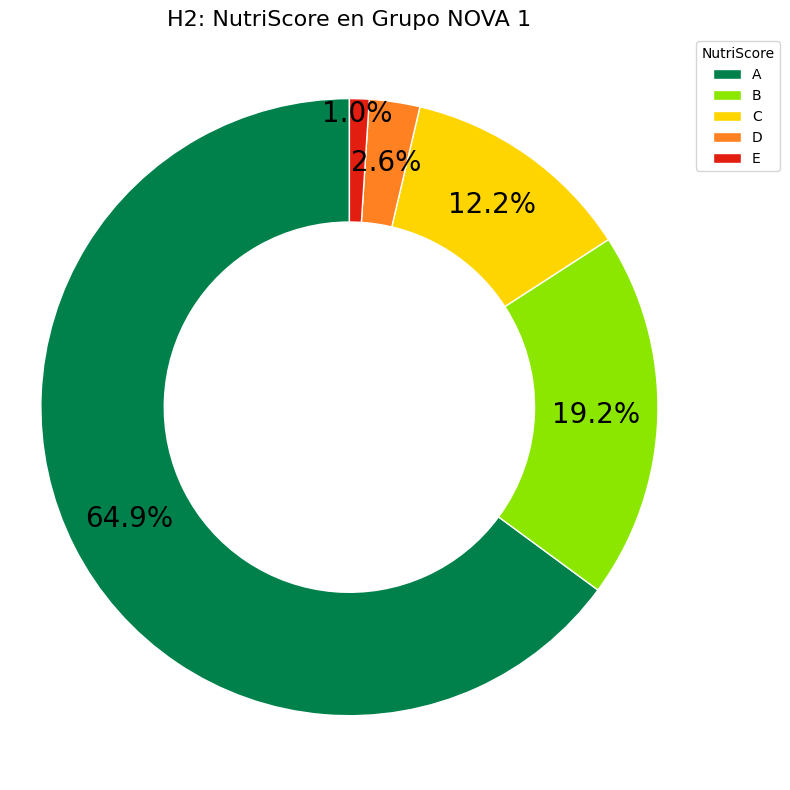

In [ ]:
tipo_nova = 1 
# ----------------------------------------------------------------------------------

# 2. Preparación de datos
data = h2_plot_df.loc[tipo_nova]
data = data[data > 0] # Elimina los grados NutriScore con 0% de representación
    
# Mapeamos los colores a los grados NutriScore que están presentes en los datos
colores_pie = colores
    
# 3. Generación de la Figura
fig, ax = plt.subplots(figsize=(8, 8))

# Generar el gráfico de Donut de forma SIMPLE
wedges, texts, autotexts = ax.pie(
    data, 
    autopct='%1.1f%%',       # Muestra el porcentaje
    startangle=90,          
    colors=colores_pie,     
    wedgeprops=dict(width=0.4, edgecolor='w'), # Crea el efecto Donut
    pctdistance=0.8                        # Distancia del porcentaje
)

# 4. Configuración y Leyenda
ax.set_title(f'H2: NutriScore en Grupo NOVA {tipo_nova}', fontsize=16)
ax.axis('equal') # Asegura la forma redonda

# Ajuste Básico de Fuente de Porcentajes
for autotext in autotexts:
    autotext.set_fontsize(20) 

# mover porcentaje hacia arriba para que no choquen
autotexts[4].set_position((autotexts[4].get_position()[0], autotexts[4].get_position()[1] + 0.15))



# Creación de Leyenda
labels = [g.upper() for g in data.index] 
ax.legend(
    wedges, 
    labels, 
    title="NutriScore", 
    loc="upper left", 
    bbox_to_anchor=(1, 0, 0.5, 1) # Mueve la leyenda fuera del gráfico
)
    
plt.tight_layout()
plt.show()

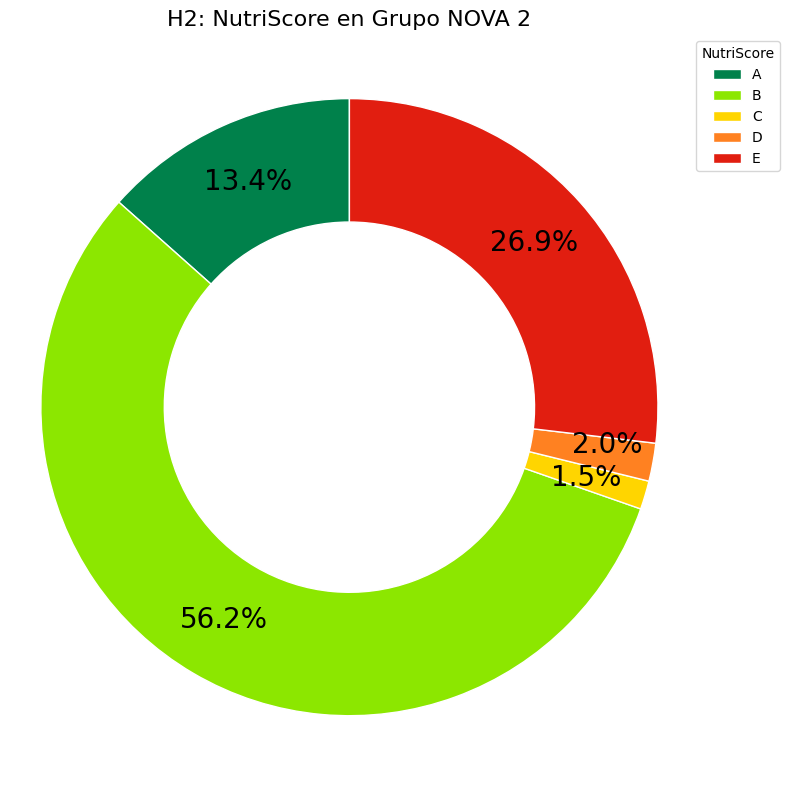

In [ ]:
tipo_nova = 2 
# ----------------------------------------------------------------------------------

# 2. Preparación de datos
data = h2_plot_df.loc[tipo_nova]
data = data[data > 0] # Elimina los grados NutriScore con 0% de representación
    
# Mapeamos los colores a los grados NutriScore que están presentes en los datos
colores_pie = colores
    
# 3. Generación de la Figura
fig, ax = plt.subplots(figsize=(8, 8))

# Generar el gráfico de Donut de forma SIMPLE
wedges, texts, autotexts = ax.pie(
    data, 
    autopct='%1.1f%%',       # Muestra el porcentaje
    startangle=90,          
    colors=colores_pie,     
    wedgeprops=dict(width=0.4, edgecolor='w'), # Crea el efecto Donut
    pctdistance=0.8                        # Distancia del porcentaje
)

# 4. Configuración y Leyenda
ax.set_title(f'H2: NutriScore en Grupo NOVA {tipo_nova}', fontsize=16)
ax.axis('equal') # Asegura la forma redonda

# Ajuste Básico de Fuente de Porcentajes
for autotext in autotexts:
    autotext.set_fontsize(20) 


autotexts[3].set_position((autotexts[3].get_position()[0] + 0.05, autotexts[3].get_position()[1]+ 0.02))



# Creación de Leyenda
labels = [g.upper() for g in data.index] 
ax.legend(
    wedges, 
    labels, 
    title="NutriScore", 
    loc="upper left", 
    bbox_to_anchor=(1, 0, 0.5, 1) # Mueve la leyenda fuera del gráfico
)
    
plt.tight_layout()
plt.show()

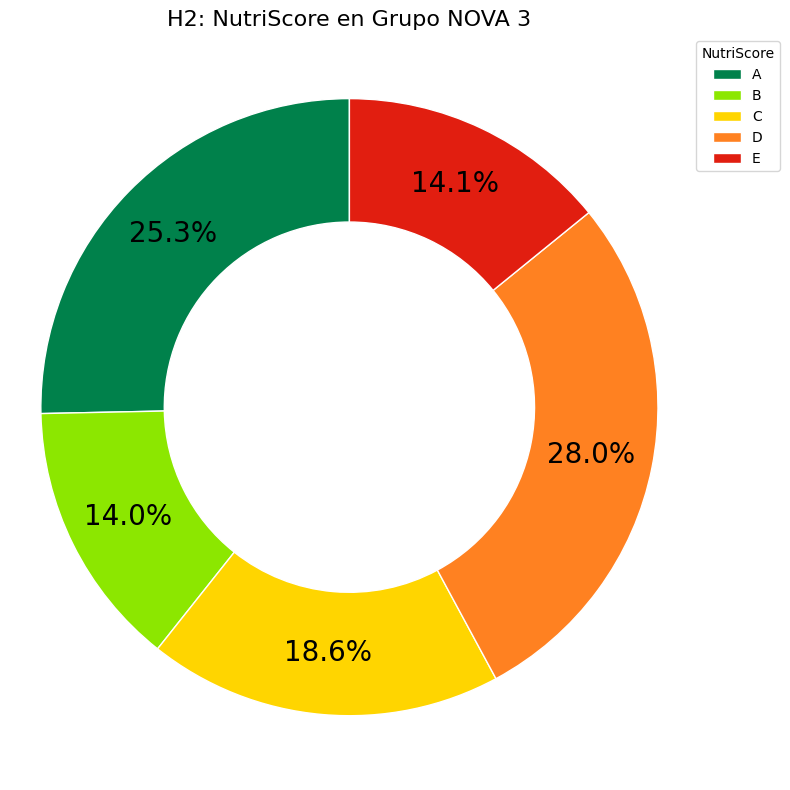

In [ ]:
tipo_nova = 3 
# ----------------------------------------------------------------------------------

# 2. Preparación de datos
data = h2_plot_df.loc[tipo_nova]
data = data[data > 0] # Elimina los grados NutriScore con 0% de representación
    
# Mapeamos los colores a los grados NutriScore que están presentes en los datos
colores_pie = colores
    
# 3. Generación de la Figura
fig, ax = plt.subplots(figsize=(8, 8))

# Generar el gráfico de Donut de forma SIMPLE
wedges, texts, autotexts = ax.pie(
    data, 
    autopct='%1.1f%%',       # Muestra el porcentaje
    startangle=90,          
    colors=colores_pie,     
    wedgeprops=dict(width=0.4, edgecolor='w'), # Crea el efecto Donut
    pctdistance=0.8                        # Distancia del porcentaje
)

# 4. Configuración y Leyenda
ax.set_title(f'H2: NutriScore en Grupo NOVA {tipo_nova}', fontsize=16)
ax.axis('equal') # Asegura la forma redonda

# Ajuste Básico de Fuente de Porcentajes
for autotext in autotexts:
    autotext.set_fontsize(20) 


#autotexts[4].set_position((autotexts[4].get_position()[0], autotexts[4].get_position()[1] + 0.15))



# Creación de Leyenda
labels = [g.upper() for g in data.index] 
ax.legend(
    wedges, 
    labels, 
    title="NutriScore", 
    loc="upper left", 
    bbox_to_anchor=(1, 0, 0.5, 1) # Mueve la leyenda fuera del gráfico
)
    
plt.tight_layout()
plt.show()

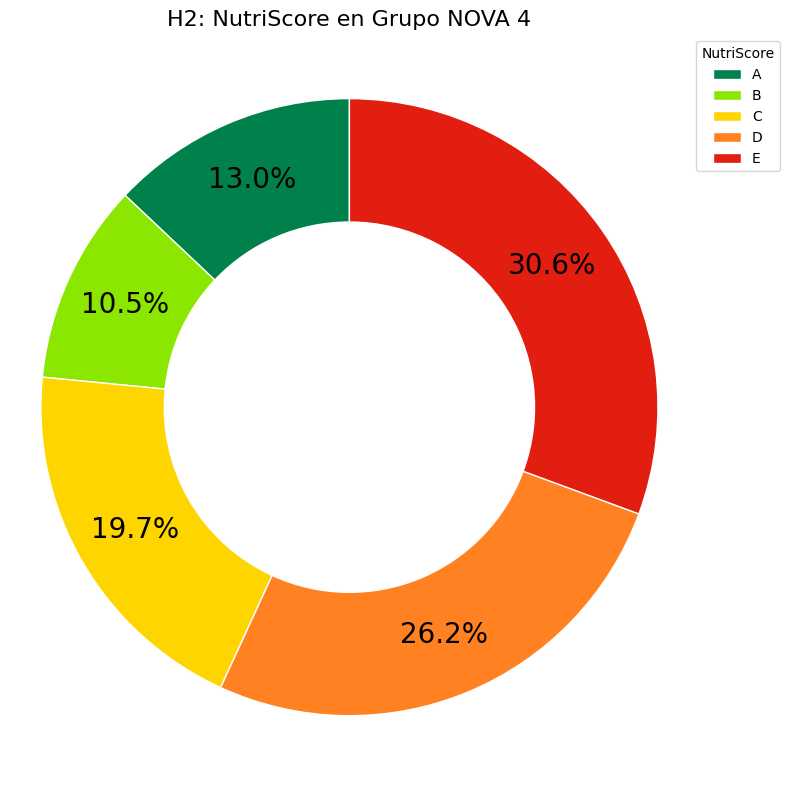

In [ ]:
tipo_nova = 4
# ----------------------------------------------------------------------------------

# 2. Preparación de datos
data = h2_plot_df.loc[tipo_nova]
data = data[data > 0] # Elimina los grados NutriScore con 0% de representación
    
# Mapeamos los colores a los grados NutriScore que están presentes en los datos
colores_pie = colores
    
# 3. Generación de la Figura
fig, ax = plt.subplots(figsize=(8, 8))

# Generar el gráfico de Donut de forma SIMPLE
wedges, texts, autotexts = ax.pie(
    data, 
    autopct='%1.1f%%',       # Muestra el porcentaje
    startangle=90,          
    colors=colores_pie,     
    wedgeprops=dict(width=0.4, edgecolor='w'), # Crea el efecto Donut
    pctdistance=0.8                        # Distancia del porcentaje
)

# 4. Configuración y Leyenda
ax.set_title(f'H2: NutriScore en Grupo NOVA {tipo_nova}', fontsize=16)
ax.axis('equal') # Asegura la forma redonda

# Ajuste Básico de Fuente de Porcentajes
for autotext in autotexts:
    autotext.set_fontsize(20) 


#autotexts[4].set_position((autotexts[4].get_position()[0], autotexts[4].get_position()[1] + 0.15))



# Creación de Leyenda
labels = [g.upper() for g in data.index] 
ax.legend(
    wedges, 
    labels, 
    title="NutriScore", 
    loc="upper left", 
    bbox_to_anchor=(1, 0, 0.5, 1) # Mueve la leyenda fuera del gráfico
)
    
plt.tight_layout()
plt.show()

[⬆️ Ir al Índice](#indice)

<a id="43-h3-densidad-calorica-y-nutriscore"></a>
## 4.3. H3 – Densidad calórica y NutriScore


¿Son los productos bajos en calorias mejor tratados en NutriScore?

In [32]:

umbral_calorias= 100

#Columnas necesarias: NutriScore y Calorías
columnas_h3 = ['off:nutriscore_grade', 'energy-kcal_value']

#Crear el DataFrame, primero eliminando NaN en las columnas clave y luego filtrando
df_h3_temp = df.dropna(subset=columnas_h3).copy()

#Aplicar el filtro de bajo valor calórico. Nos quedamos solo los que tienen menos de 100 calorias
df_h3 = df_h3_temp[df_h3_temp['energy-kcal_value'] < umbral_calorias].copy()

print(f"DataFrame 'df_h3' creado.")
print(f"Productos iniciales con datos calóricos: {len(df_h3_temp)}")
print(f"Registros de H3 (menos de {umbral_calorias} kcal/100g): {len(df_h3)}")

DataFrame 'df_h3' creado.
Productos iniciales con datos calóricos: 3534
Registros de H3 (menos de 100 kcal/100g): 996


Que esperamos ver: Que dentro de los productos con menos de 100 kcal/100g, existan NutriScores intermedios o malos (C, D, E).

In [33]:
# Calcular la distribución porcentual en df_h3
distribucion_h3 = (df_h3['off:nutriscore_grade'].value_counts(normalize=True).reindex(nutri_orden) * 100)

distribucion_df = distribucion_h3.rename('Porcentaje').reset_index()
distribucion_df.columns = ['Grado', 'Porcentaje']
distribucion_df['Grado'] = distribucion_df['Grado'].str.upper()

print("📊 Distribución de NutriScore en Productos < 100 kcal/100g")
print("-" * 60)
print(distribucion_df)

📊 Distribución de NutriScore en Productos < 100 kcal/100g
------------------------------------------------------------
  Grado  Porcentaje
0     A   37.248996
1     B   30.923695
2     C   22.289157
3     D    5.120482
4     E    4.417671


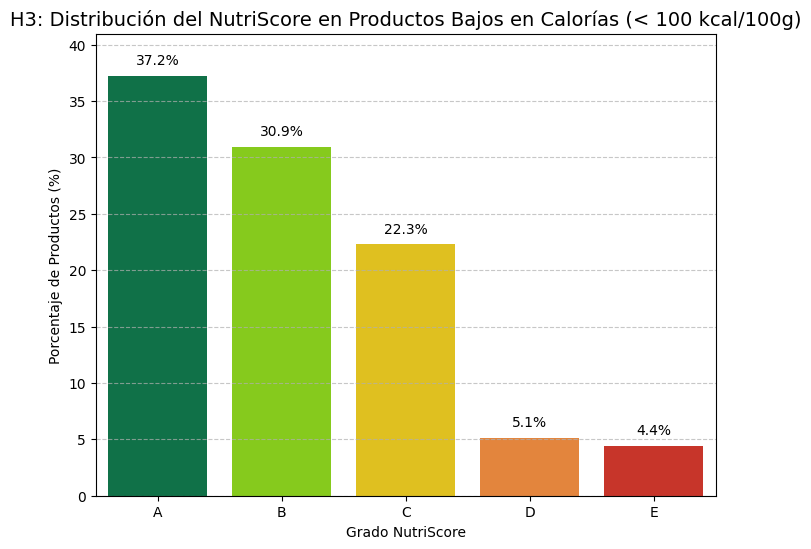

In [34]:
#graficos

plt.figure(figsize=(8, 6))
sns.barplot(
    x='Grado', 
    y='Porcentaje', 
    data=distribucion_df, 
    order=['A', 'B', 'C', 'D', 'E'],
    palette=colores
)

plt.title('H3: Distribución del NutriScore en Productos Bajos en Calorías (< 100 kcal/100g)', fontsize=14)
plt.xlabel('Grado NutriScore')
plt.ylabel('Porcentaje de Productos (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, distribucion_df['Porcentaje'].max() * 1.1)

# Añadir etiquetas de porcentaje encima de las barras
for index, row in distribucion_df.iterrows():
    plt.text(
        index, 
        row['Porcentaje'] + 1, 
        f"{row['Porcentaje']:.1f}%", 
        color='black', 
        ha="center",
        fontsize=10
    )

plt.show()

Conclusion final. 
- No se puede concluir firmemente la hipotesis.
- El bajo contenido calórico suele correlacionarse con un buen NutriScore, pero no es una garantía; casi un tercio de estos productos, estan en los grados medios bajos.

Por ejemplo, un caldo de verduras deshidratado (NutriScore D) puede ser bajo en calorías pero obtener mala puntuación debido a su elevado contenido en sal. En cambio, una gelatina ‘light’ sin azúcares (NutriScore A) combina baja densidad calórica y un perfil nutricional favorable, mostrando la excepción.

[⬆️ Ir al Índice](#indice)

<a id="44-h4-nutriscore-dentro-de-los-ultraprocesados-nova4"></a>
## 4.4. H4 – NutriScore dentro de los ultraprocesados (NOVA 4)


In [35]:
grupo_nova = 4.0

#Columnas necesarias: NutriScore, NOVA, y los 3 nutrientes malos.
columnas_h4 = ['off:nutriscore_grade', 'nova_group', 'sugars_value', 'fat_value', 'salt_value']

#Crear el DataFrame, primero eliminando NaN en las columnas clave y luego filtrando
df_h4_temp = df.dropna(subset=columnas_h4).copy()

#Aplicar el filtro para quedarnos solo con los ultraprocesados
df_h4 = df_h4_temp[df_h4_temp['nova_group'] == grupo_nova].copy()

print(f"DataFrame 'df_h4' creado.")
print(f"Registros iniciales: {len(df_h4_temp)} (sin NaN en columnas clave)")
print(f"Registros de H4 (solo NOVA 4): {len(df_h4)}")

DataFrame 'df_h4' creado.
Registros iniciales: 2495 (sin NaN en columnas clave)
Registros de H4 (solo NOVA 4): 934


Que esperamos ver: Que dentro del grupo NOVA 4, la mayoría de los productos se concentren en NutriScore D-E, sin gran variabilidad entre categorías

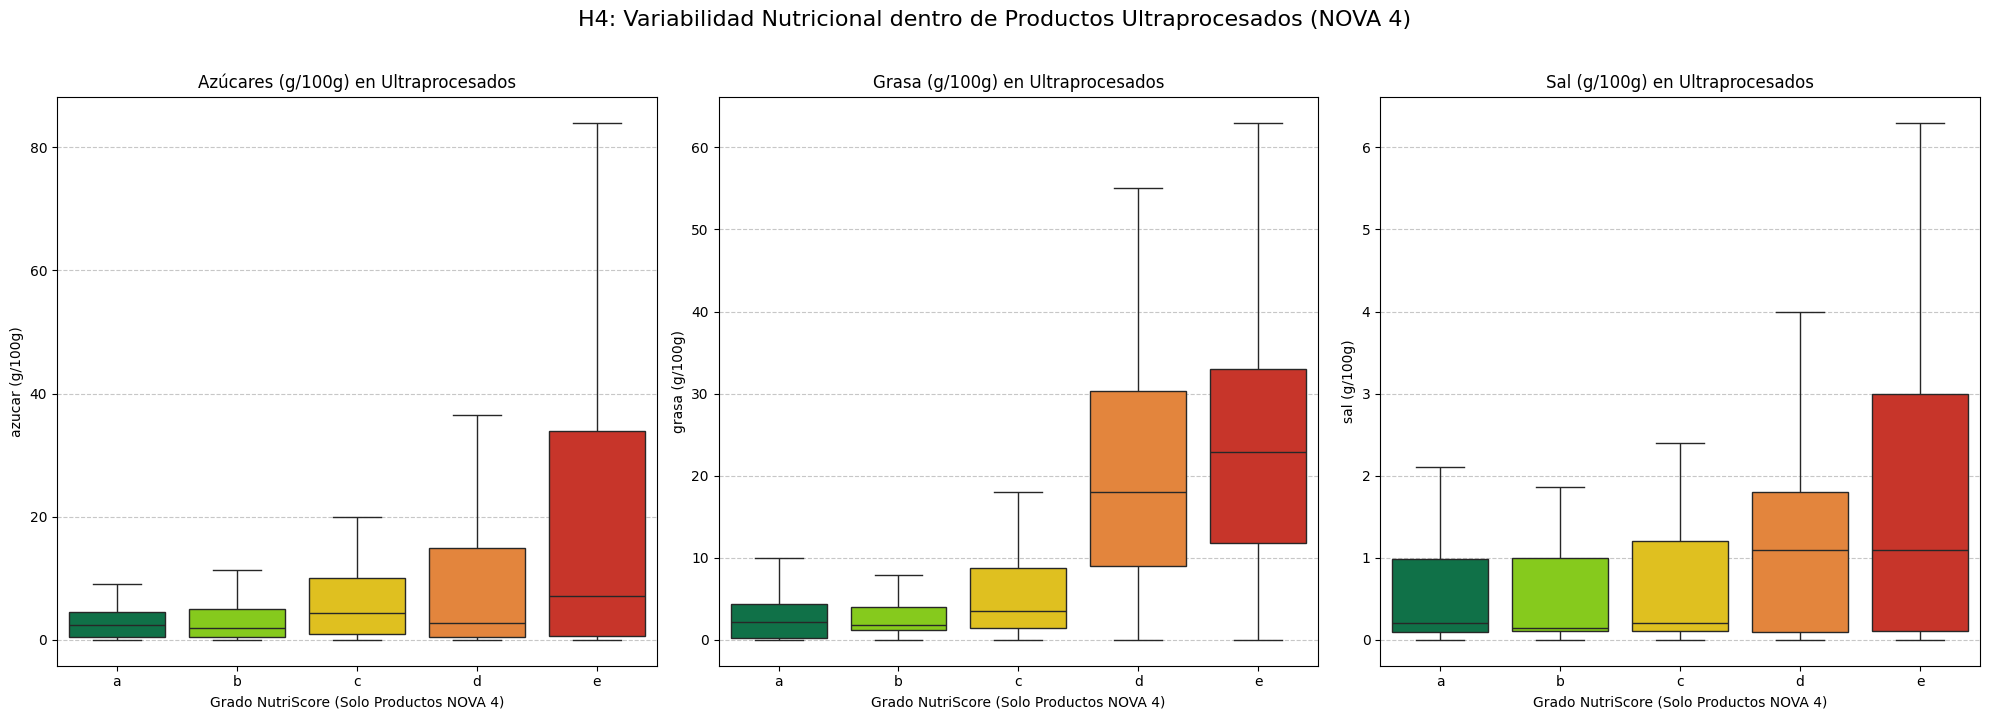

In [36]:
#graficos

#  Definimos la configuración para los gráficos
nutrientes = ['sugars_value', 'fat_value', 'salt_value']
etiquetas = ["azucar", "grasa", "sal"]
titulos = [
    'Azúcares (g/100g) en Ultraprocesados', 
    'Grasa (g/100g) en Ultraprocesados', 
    'Sal (g/100g) en Ultraprocesados'
]

#  Creamos la figura que contendrá los 3 gráficos (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=False)
plt.suptitle('H4: Variabilidad Nutricional dentro de Productos Ultraprocesados (NOVA 4)', fontsize=16, y=1.02)

for i, nutriente in enumerate(nutrientes):
    sns.boxplot(
        x='off:nutriscore_grade',
        y=nutriente,
        data=df_h4,
        order=nutri_orden,
        ax=axes[i],
        palette=colores,
        # Ocultamos los outliers para que la caja y los bigotes sean más claros
        showfliers=False 
    )
    
    # Añadimos etiquetas y título
    axes[i].set_title(titulos[i])
    axes[i].set_xlabel('Grado NutriScore (Solo Productos NOVA 4)')
    axes[i].set_ylabel(f'{etiquetas[i]} (g/100g)')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustamos el layout
plt.tight_layout()
plt.show()

1. La Hipótesis es Verificada (Especialmente en Azúcares y Sal)
La hipótesis es VERIFICADA. El NutriScore, si bien penaliza a los productos ultraprocesados en general (H2), muestra una deficiente capacidad para diferenciar la calidad interna dentro de este grupo NOVA 4, especialmente en los grados intermedios ('C' y 'D').

2. Evidencia Clave: La Gran Dispersión (Varianza)
La variabilidad se observa en el tamaño de las cajas y la superposición entre ellas:

Azúcares (G/100g): Las cajas para los grados 'A' a 'C' son pequeñas y cercanas al cero, lo cual es correcto. Sin embargo, la variabilidad se vuelve extrema en 'D' y 'E'. La caja 'E' es masiva, indicando que un producto con NutriScore 'E' puede tener una cantidad de azúcar muy alta o una cantidad relativamente baja, lo cual es coherente con que ese producto esté siendo penalizado por otro nutriente (ej. sal o grasas).

Sal (G/100g): La mayor evidencia de falta de diferenciación se da aquí. Las cajas de los grados 'A', 'B', 'C' y 'D' se superponen completamente, y su mediana (la línea dentro de la caja) apenas se mueve.

Interpretación: Esto significa que un ultraprocesado con NutriScore 'A' puede tener la misma cantidad de sal que un ultraprocesado con NutriScore 'D'. El NutriScore no está utilizando el contenido de sal como un factor diferencial en estos grados intermedios.

Grasa (G/100g): La tendencia aquí es la más clara, con la mediana aumentando consistentemente de 'A' a 'E'. Aunque las cajas se superponen, la Grasa parece ser el nutriente que mejor logra diferenciar los grados NutriScore dentro de los ultraprocesados, en contraste con el Azúcar y la Sal.

3. Síntesis y Crítica
El hallazgo principal es que el NutriScore no es un indicador confiable para el contenido de Sal y Azúcares en los grados intermedios de los alimentos ultraprocesados. Un producto NOVA 4 con NutriScore 'C' puede tener tanto un contenido bajo como un contenido alto de estos nutrientes.

Conclusión clave para la presentación: La H4 revela la debilidad del NutriScore al penalizar a los ultraprocesados por solo un factor dominante, permitiendo que otros nutrientes críticos varíen descontroladamente dentro de ese mismo grado.

Por ejemplo, un cereal de desayuno integral con fibra y bajo en azúcar (NutriScore A) representa un caso de ultraprocesado reformulado que obtiene buena puntuación. Por el contrario, una barrita de chocolate y miel con azúcares añadidos (NutriScore E) refleja el extremo opuesto del mismo grupo NOVA, donde el NutriScore sí penaliza la composición. Este contraste ilustra la falta de consistencia del sistema dentro de los ultraprocesados

[⬆️ Ir al Índice](#indice)

<a id="45-h5-consumo-y-calidad-nutricional-en-espana"></a>
## 4.5. H5 – Consumo y calidad nutricional en España


In [37]:
df_api=pd.read_csv("../Data/resultados_api.csv")

In [38]:
# Limpieza de NaN en las columnas clave (NutriScore y NOVA)
# Reemplazamos 'nan' y convertimos nova_group a numérico
df_api['nova_group'] = pd.to_numeric(df_api['nova_group'], errors='coerce')
df_h5 = df_api.dropna(subset=['nutriscore_grade', 'nova_group']).copy()

In [39]:
# Cálculo de las distribuciones porcentuales
# --- NutriScore ---
nutri_distribucion = (df_h5['nutriscore_grade'].str.upper().value_counts(normalize=True).reindex(['A', 'B', 'C', 'D', 'E']) * 100).fillna(0)
nutri_df = nutri_distribucion.rename('Porcentaje').reset_index()

# --- NOVA Group ---
nova_distribucion = (df_h5['nova_group'].value_counts(normalize=True).sort_index() * 100).fillna(0)
nova_df = nova_distribucion.rename('Porcentaje').reset_index()
nova_df['Grupo NOVA'] = nova_df['nova_group'].astype(int)

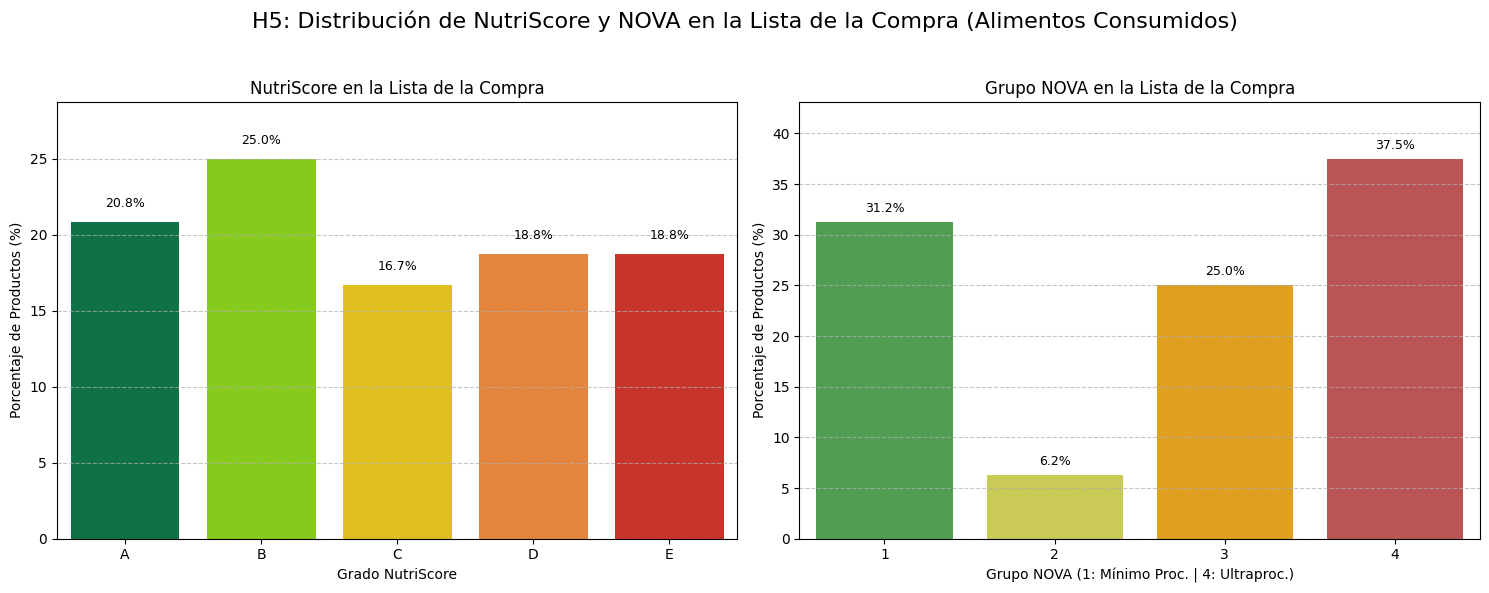

In [40]:
#graficos

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle('H5: Distribución de NutriScore y NOVA en la Lista de la Compra (Alimentos Consumidos)', fontsize=16)
max_nutri = nutri_df['Porcentaje'].max()
ymax_nutri = max_nutri * 1.15  

max_nova = nova_df['Porcentaje'].max()
ymax_nova = max_nova * 1.15 

# GRAFICO 1: DISTRIBUCIÓN NUTRISCORE
sns.barplot(
    x='nutriscore_grade', 
    y='Porcentaje', 
    data=nutri_df, 
    order=['A', 'B', 'C', 'D', 'E'],
    palette=colores,
    ax=axes[0]
)
axes[0].set_title('NutriScore en la Lista de la Compra')
axes[0].set_xlabel('Grado NutriScore')
axes[0].set_ylabel('Porcentaje de Productos (%)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_ylim(0, ymax_nutri) 
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas
for index, row in nutri_df.iterrows():
    axes[0].text(
        index, row['Porcentaje'] + 1, f"{row['Porcentaje']:.1f}%", color='black', ha="center", fontsize=9
    )

# GRAFICO 2: DISTRIBUCIÓN NOVA
sns.barplot(
    x='Grupo NOVA', 
    y='Porcentaje', 
    data=nova_df, 
    order=[1, 2, 3, 4],
    palette=colores_nova, # Colores NOVA
    ax=axes[1]
)
axes[1].set_title('Grupo NOVA en la Lista de la Compra')
axes[1].set_xlabel('Grupo NOVA (1: Mínimo Proc. | 4: Ultraproc.)')
axes[1].set_ylabel('Porcentaje de Productos (%)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].set_ylim(0, ymax_nova)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas
for index, row in nova_df.iterrows():
    axes[1].text(
        index, row['Porcentaje'] + 1, f"{row['Porcentaje']:.1f}%", color='black', ha="center", fontsize=9
    )

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

1. NutriScore: Desmiente la HipótesisContrario a la hipótesis, la distribución del NutriScore en los productos más consumidos es favorable, mostrando una tendencia positiva:Dominio de la Buena Calidad: Los grados A y B suman un 45.8% ($\approx 20.8\% + 25.0\%$).Peor Calidad (D y E): Los grados D y E, que representan la peor calidad, suman un 37.6% ($\approx 18.8\% + 18.8\%$).Conclusión NutriScore: Aunque la presencia de 'D' y 'E' es alta, la categoría más numerosa es la 'B'. La lista de la compra está bien equilibrada entre buena y mala calidad nutricional.
2. NOVA: Confirma la HipótesisLa distribución del Grupo NOVA confirma rotundamente la segunda parte de la hipótesis: los alimentos consumidos son, predominantemente, ultraprocesados.Ultraprocesados (NOVA 4): Esta es la categoría más numerosa con un abrumador 37.5%. Esto coincide con las tendencias dietéticas modernas, donde casi 4 de cada 10 productos comprados caen en la categoría de ultraprocesados.Mínimo Procesamiento (NOVA 1): Es la segunda categoría más grande (31.2%), gracias a alimentos básicos como el arroz, las legumbres, las verduras y el agua que se incluyeron en la lista.Conclusión NOVA: El consumo está polarizado en los extremos: se compran muchos básicos sin procesar, pero el resto se va directamente a los productos de mayor procesamiento.

[⬆️ Ir al Índice](#indice)

<a id="5-hallazgo-critico-y-consumo-hipotesis-h5"></a>
# 5. Hallazgo Crítico y Consumo (Hipótesis H5)

Esta sección se centra en un caso de estudio sobre la **Cesta de la Compra Española** y la verificación de la **Hipótesis H5**.


<a id="51-el-hallazgo-critico-la-discrepancia-entre-sistemas"></a>
## 5.1. El Hallazgo Crítico: La Discrepancia entre Sistemas

**Problema:**  
Se confirma la existencia de una discrepancia fundamental donde productos **altamente procesados (NOVA 4)** pueden obtener la **máxima calificación (NutriScore A)**.  
El sistema NutriScore prioriza el perfil nutricional (fibra, proteína, bajo sodio) sobre el grado de procesamiento.

**Ejemplo típico:**  
Cereales enriquecidos con fibra o proteínas que, pese a ser ultraprocesados, reciben calificación A o B, generando confusión en el consumidor sobre su verdadera calidad alimentaria.


<a id="52-analisis-de-consumo-y-verificacion-de-la-hipotesis-h5"></a>
## 5.2. Análisis de Consumo y Verificación de la Hipótesis H5

**Hipótesis H5 (Polarización del Consumo):**  
¿El consumo de alimentos más populares está polarizado hacia los extremos (**NOVA 1** y **NOVA 4**)?

| **Sistema** | **Distribución** | **Conclusión H5** |
|--------------|------------------|-------------------|
| **NutriScore** | La categoría más numerosa es la 'B'. Los grados A y B suman un 45.8%. D y E suman 37.6%. | **Parcialmente Falsa:** La cesta de la compra está bien equilibrada en calidad nutricional. |
| **NOVA** | La categoría Ultraprocesados (NOVA 4) es la más numerosa con un 37.5%. La segunda más grande es Mínimo Procesamiento (NOVA 1) con 31.2%. | **Verdadera:** El consumo está fuertemente polarizado en los extremos: alimentos básicos sin procesar y ultraprocesados. |

**Interpretación:**  
Aunque la calidad nutricional promedio parece equilibrada, el patrón de consumo revela una fuerte **dualidad alimentaria**: coexistencia de productos frescos y ultraprocesados, con escasa presencia de alimentos intermedios.


[⬆️ Ir al Índice](#indice)

<a id="6-conclusiones-finales"></a>
# 6. Conclusiones Finales

El informe concluye con la síntesis de los hallazgos más relevantes:

### Compatibilidad Limitada  
NutriScore y NOVA miden la calidad alimentaria desde **ángulos diferentes** (Nutricional vs. Procesamiento).

### Riesgo de Engaño  
El sistema NutriScore, al no penalizar el procesamiento, puede **incentivar a la industria** a reformular ultraprocesados (NOVA 4) para obtener la mejor calificación (A/B), dando una **falsa sensación de salubridad**.

### Utilidad Dual  
Ambos sistemas son útiles, pero deben **usarse conjuntamente**:
- **NutriScore**: Adecuado para comparar productos dentro de una misma categoría o detectar los “peores” de un grupo homogéneo.  
- **NOVA**: Esencial para orientar el consumo hacia una dieta más basada en alimentos frescos o mínimamente procesados.

### Recomendación  
Para guiar al consumidor de manera efectiva, se sugiere utilizar:
- **NutriScore** → Evaluar la **calidad nutricional**.  
- **NOVA** → Evaluar el **grado de procesamiento**.

Esta complementariedad ofrece una visión más completa y honesta del valor real de los productos alimentarios.


[⬆️ Ir al Índice](#indice)

Fuentes:

- https://get.apicbase.com/nutri-score-science-based-nutritional-value-labelling-system/
- https://es.openfoodfacts.org/